In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from DS_Planck_Unet import load_planck_model, draw_pic_with_mask, draw_pic, val_pix
from DS_healpix_fragmentation import *
from DS_data_transformation import pic2fits
from DS_detector import *
import os
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from DS_data_transformation import normalize
%config InlineBackend.figure_format = 'retina'

In [2]:
pix2 = val_pix[0]
pix2

9

In [3]:
cat = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv')
cat = cat[cat['status'] == 'tp']
cat = cat[cat['catalog'] == 'planck_z']
cat = cat[radec2pix(cat['tRA'], cat['tDEC'], 2) == pix2]
cat.index = np.arange(len(cat))
cat.shape

(29, 15)

In [4]:
size = 16

In [5]:
coords = np.stack([cat['tRA'], cat['tDEC']]).T
coords.shape

(29, 2)

In [6]:
matr = one_pixel_fragmentation(2, pix2, 10)

In [7]:
mdict = matr2dict(matr)

In [8]:
pz_model = load_planck_model('/home/rt2122/Models/pz_only_rot/pz_only_rot.ep0028-vl0.005815-l0.004588.hdf5')
act_model = load_planck_model('/home/rt2122/Models/act_found2/pz_act_found2.ep0022-vl0.008890-l0.008042.hdf5')
all_model = load_planck_model('/home/rt2122/Models/all_found/all_found.ep0034-vl0.009741-l0.008339.hdf5')

In [9]:
pz_data_dict = gen_pics_for_detection(pix2, pz_model, step=8)
pz_connected = connect_masks(pz_data_dict['ans'], pz_data_dict['pic_idx'])
del pz_data_dict

In [10]:
act_data_dict = gen_pics_for_detection(pix2, act_model, step=8)
act_connected = connect_masks(act_data_dict['ans'], act_data_dict['pic_idx'])
del act_data_dict

In [11]:
all_data_dict = gen_pics_for_detection(pix2, all_model, step=8)
all_connected = connect_masks(all_data_dict['ans'], all_data_dict['pic_idx'])
del all_data_dict

In [12]:
pic, mask = draw_pic_with_mask(None, coords, matr=matr)
ypic = draw_pic(matr, y=True)

In [46]:
def pic10(idx): 
    print(coords[idx])
    x, y = mdict[radec2pix(*coords[idx], 2**11)]
    sm_pic = pic[x-size:x+size, y-size:y+size]
    sm_ypic = ypic[x-size:x+size, y-size:y+size]
    sm_mask = mask[x-size:x+size, y-size:y+size]
    sm_pz = pz_connected[x-size:x+size, y-size:y+size]
    sm_act = act_connected[x-size:x+size, y-size:y+size]
    sm_all = all_connected[x-size:x+size, y-size:y+size]
    s = 100
    _, ax = plt.subplots(2, 5, figsize=(17, 7), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.05, hspace=0.001)
    
    pic_dict = {6 : sm_pz, 7 : sm_act, 8 : sm_all, 9:sm_ypic}
    
    for i in range(2):
        for j in range(5):
            if 5*i+j < 6:
                ax[i][j].imshow(sm_pic[:,:,5*i+j])
            else:
                ax[i][j].imshow(pic_dict[5*i+j][:,:,0])
    for i in range(2):
        for j in range(5):
            ax[i][j].scatter([size], [size], marker='x', c='r', s=s)
            
    ax[1][-1].set_xlabel('y map')
    ax[1][1].set_xlabel('Model 1 (pz_rot28)')
    ax[1][2].set_xlabel('Model 2 (pz_act_found2_22)')
    ax[1][3].set_xlabel('Model 3 (pz_all_found34)')

[158.5914521 -17.3441739]


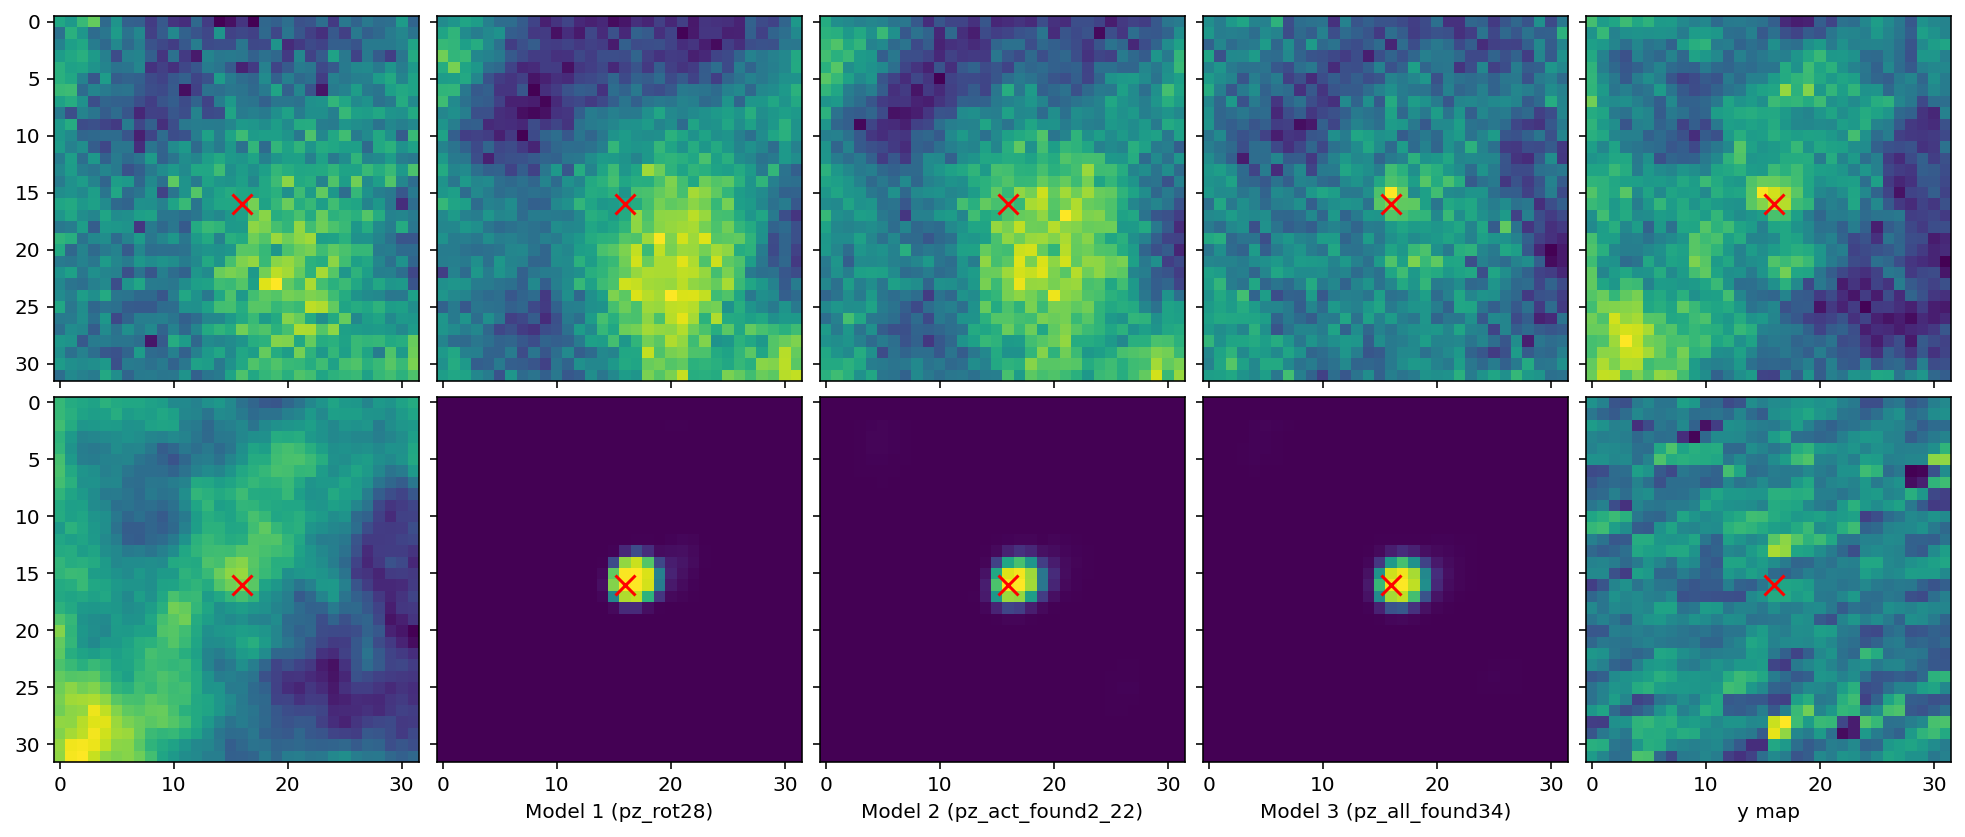

In [47]:
pic10(0)

[149.6017812 -11.0690075]


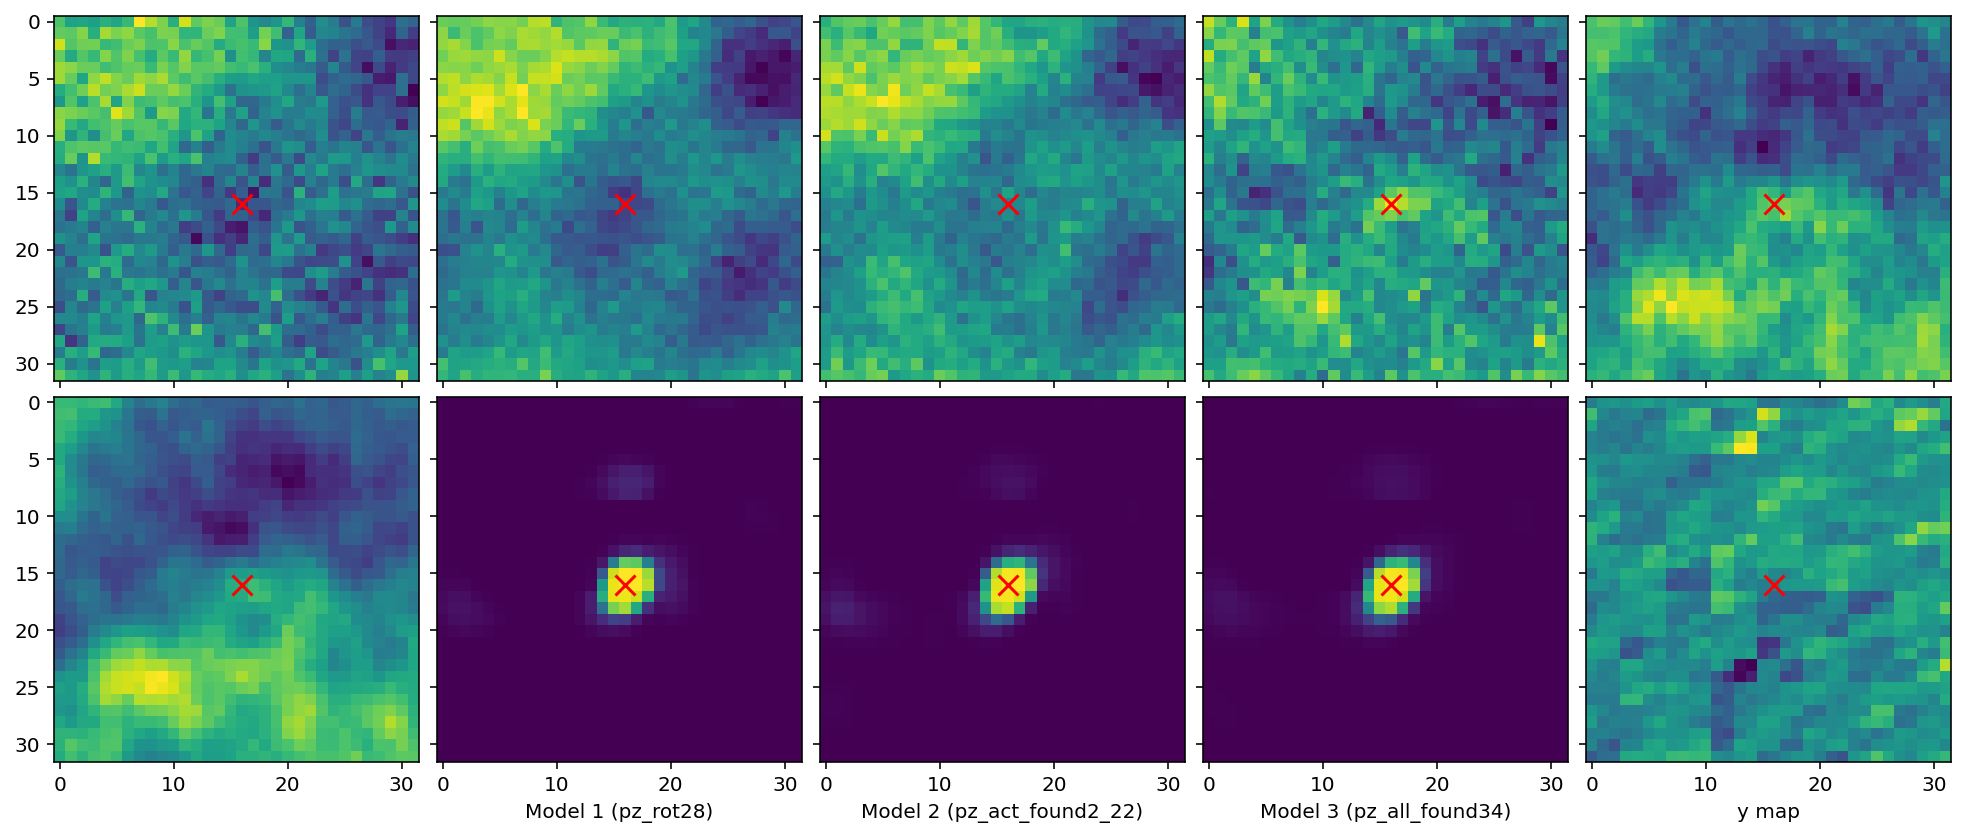

In [55]:
pic10(8)

[155.7863834  -6.6054532]


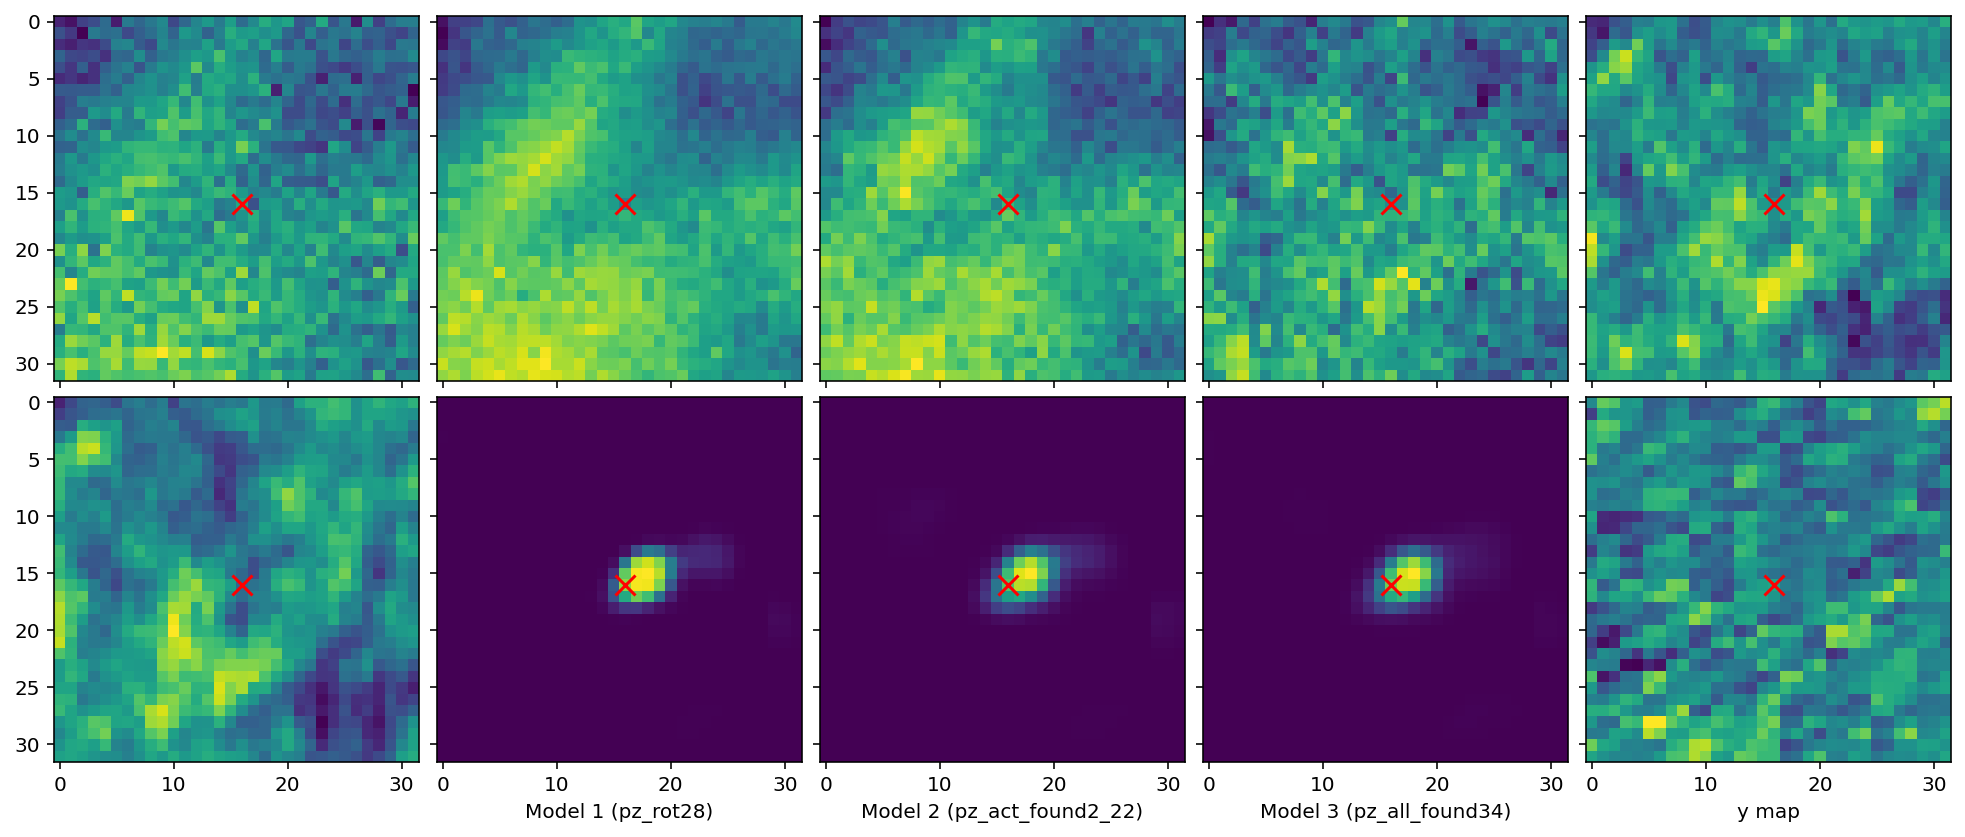

In [61]:
pic10(14)

[164.5697088  -2.1905538]


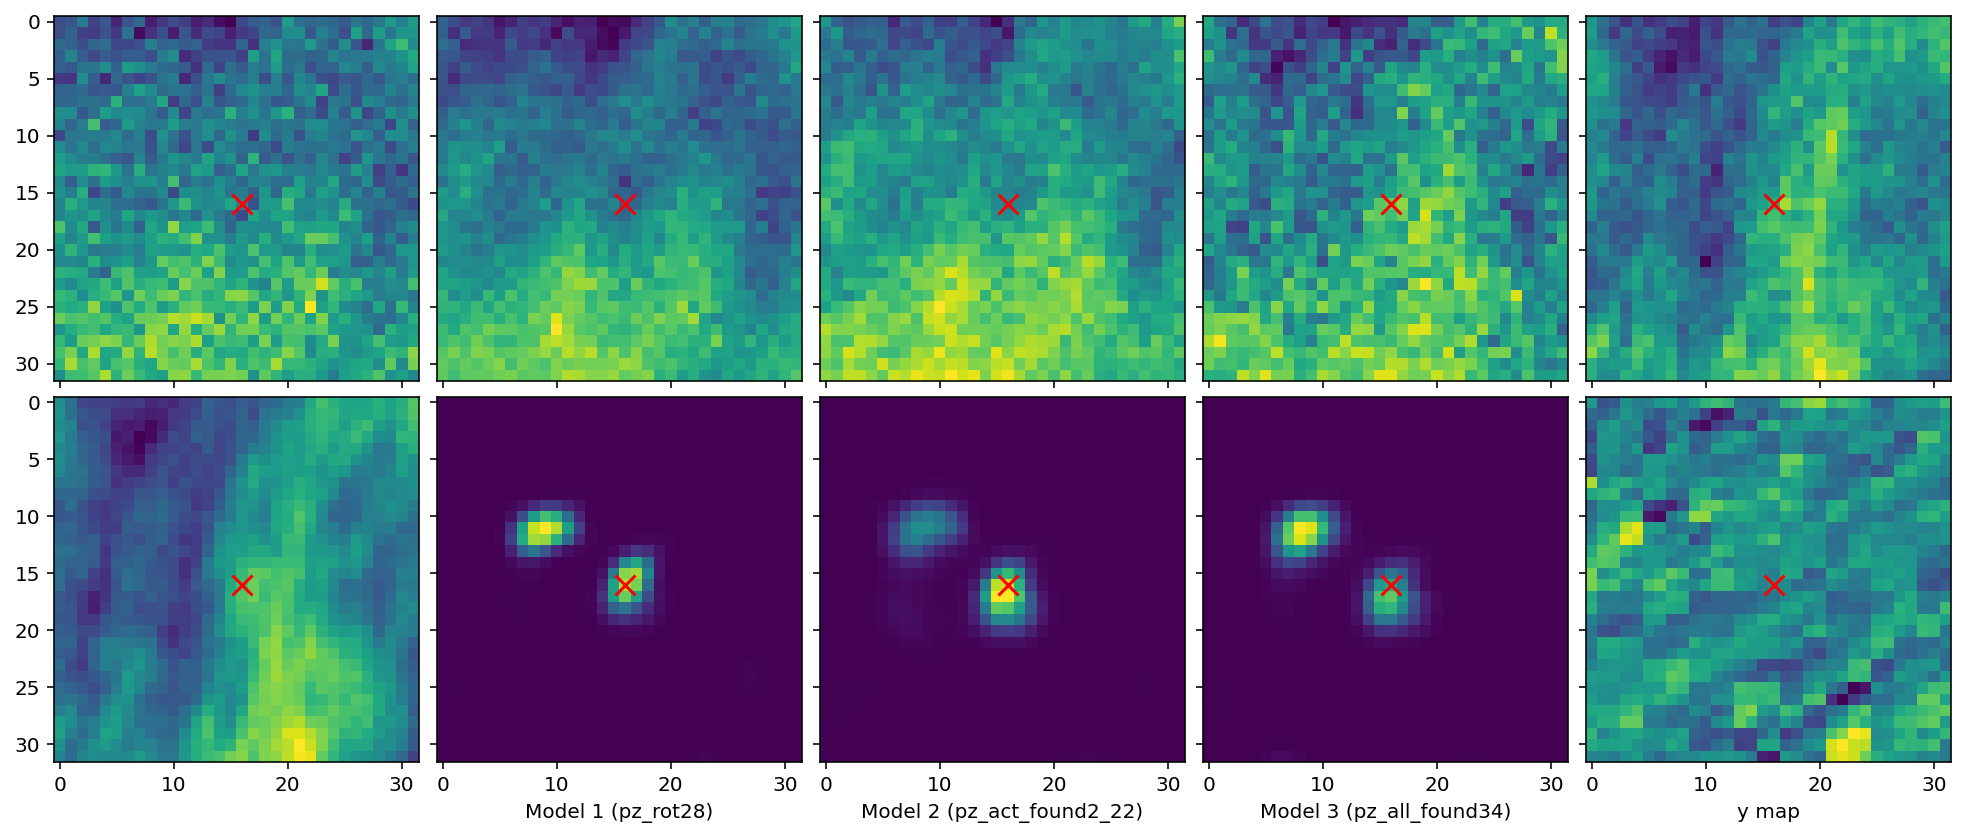

In [62]:
pic10(15)

[153.5054259  -0.9589484]


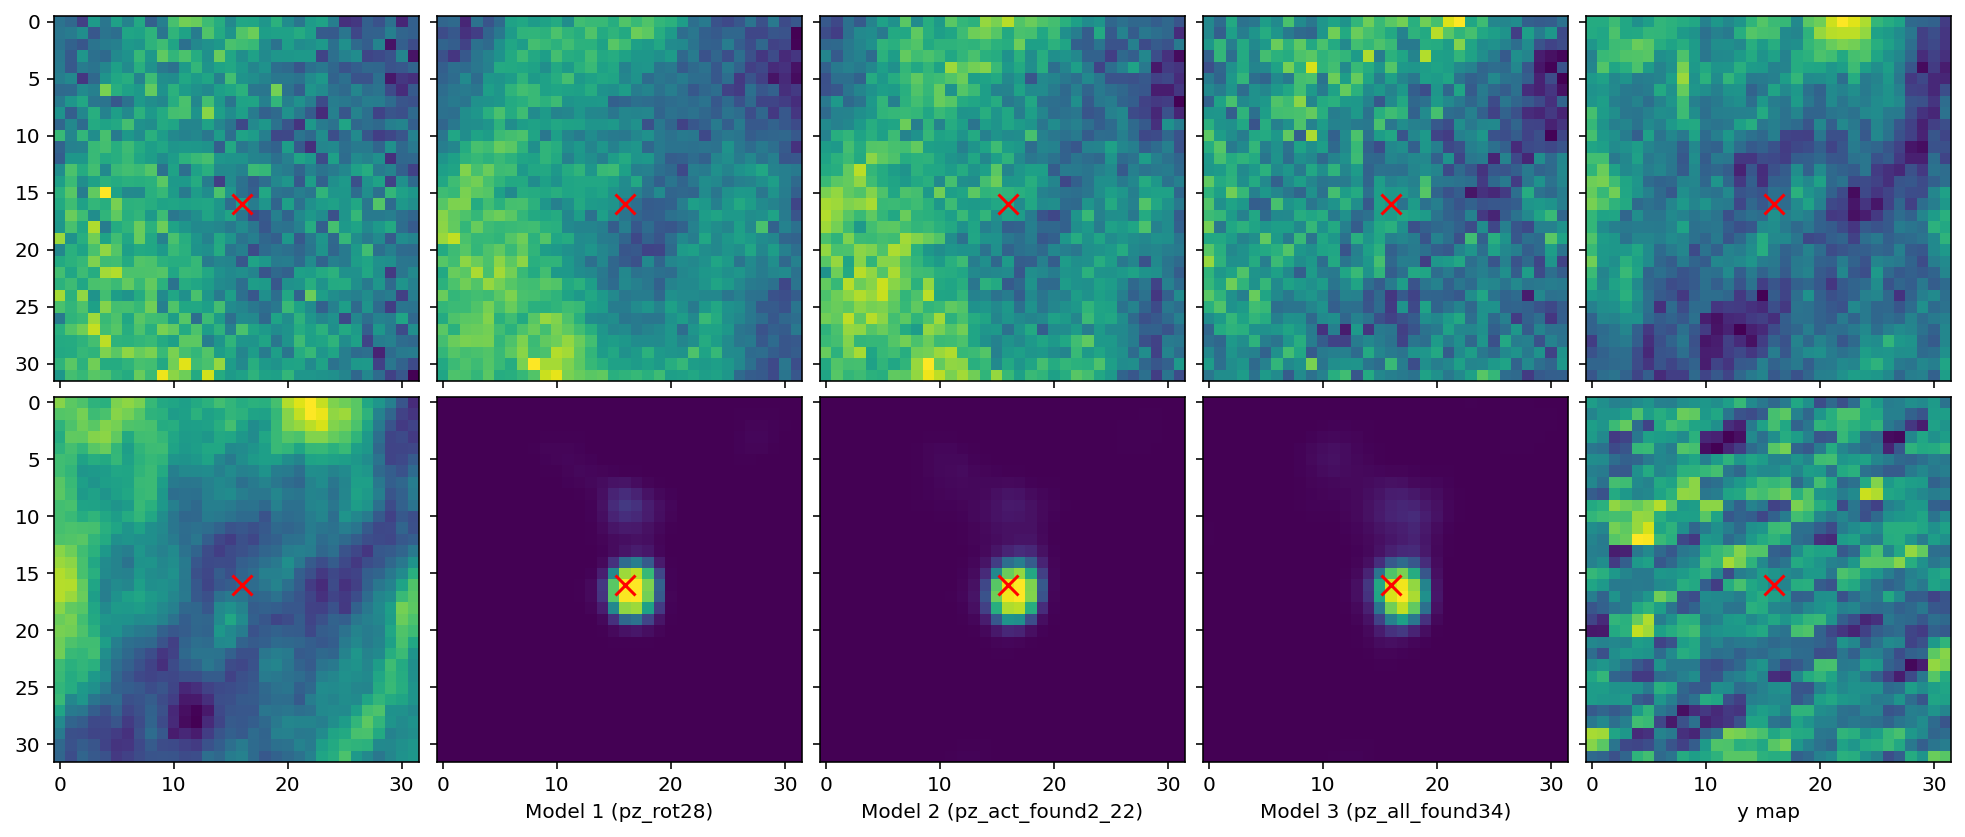

In [63]:
pic10(16)

In [41]:
cat.iloc[17]

RA           143.776
DEC         0.797716
area              22
min_rad      1.45215
max_rad      3.94318
mean_rad     2.79702
min_pred    0.110966
max_pred    0.759099
tRA           143.82
tDEC        0.818445
status            tp
catalog     planck_z
Name: 17, dtype: object

In [44]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')
planck_z[np.abs(planck_z['RA'] - cat.iloc[17]['tRA']) < 0.1]

,Name,RA,DEC,z,M500,MCXC,RedMAPPer
724,PSZ2 G233.68+36.14,143.81963,0.818445,0.356823,5.47738,,RMJ093515.3+004746.0
